<a href="https://colab.research.google.com/github/junghyeon0114/book_pythonN100/blob/main/Part1_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PART 1. 웹 스크래핑    


**01) 웹 서버에 요청하고 응답받기**

- requests
:웹 서버에 요청하고 응답 받는 과정을 처리하는 파이썬 라이브러리

In [2]:
#  requests 실행

import requests

# python 공식 홈페이지의 URL
url = 'https://www.python.org/'

# 웹 서버에 get 요청
resp = requests.get(url)
print(resp)

url2 = 'https://www.python.org/1'
resp2 = requests.get(url2)
print(resp2)

<Response [200]>
<Response [404]>


--> 정상적으로 통신이 이루어짐
- Response : 웹서버가 보내준 응답 객체
- [200] : 정상을 뜻하는 응답 코드

**02) 웹 페이지 소스코드 확인하기**

In [4]:
import requests


resp = requests.get(url)

# resp에는 headers, cookies, text 등 여러 속성을 갖음
html = resp.text
print(html)

<!doctype html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->
<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->

<head>
    <!-- Google tag (gtag.js) -->
    <script async src="https://www.googletagmanager.com/gtag/js?id=G-TF35YF9CVH"></script>
    <script>
      window.dataLayer = window.dataLayer || [];
      function gtag(){dataLayer.push(arguments);}
      gtag('js', new Date());
      gtag('config', 'G-TF35YF9CVH');
    </script>
    <!-- Plausible.io analytics -->
    <script defer data-domain="python.org" src="https://plausible.io/js/script.js"></script>

    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">
    <link rel="prefetch" 

**03) 로봇 배제 표준**


In [8]:
import requests

# python 공식 홈페이지의 URL
urls = ['https://www.naver.com/', 'https://www.python.org/' ]
filename = 'robots.txt'

for url in urls:
    file_path = url+filename
    print(file_path)
    resp = requests.get(file_path)
    print(resp.text)
    print('\n')


https://www.naver.com/robots.txt
User-agent: *
Disallow: /
Allow : /$
Allow : /.well-known/privacy-sandbox-attestations.json


https://www.python.org/robots.txt
# Directions for robots.  See this URL:
# http://www.robotstxt.org/robotstxt.html
# for a description of the file format.

User-agent: HTTrack
User-agent: puf
User-agent: MSIECrawler
Disallow: /

# The Krugle web crawler (though based on Nutch) is OK.
User-agent: Krugle
Allow: /
Disallow: /~guido/orlijn/
Disallow: /webstats/

# No one should be crawling us with Nutch.
User-agent: Nutch
Disallow: /

# Hide old versions of the documentation and various large sets of files.
User-agent: *
Disallow: /~guido/orlijn/
Disallow: /webstats/





**04) BeautifulSoup 객체 만들기**

- 파싱(parsing)
: Html 소스코드를 해석하는 것

- BeautifulSoup
: Html 문서에서 정보 추출 위한 라이브러리

In [9]:
import requests
from bs4 import BeautifulSoup

url = 'https://en.wikipedia.org/wiki/Seoul_Metropolitan_Subway'
resp = requests.get(url)
html_src = resp.text

#parser : html을 파싱(해석)하는 구문 해석기
soup = BeautifulSoup(html_src, 'html.parser')
print(type(soup))
print('\n')

print(soup.head)
print('\n')
print(soup.body)
print('\n')

print('title 태그 요소:', soup.title)
print('title 태그 이름', soup.title.name)
print('title 태그 문자열', soup.title.string)


<class 'bs4.BeautifulSoup'>


<head>
<meta charset="utf-8"/>
<title>Seoul Metropolitan Subway - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available";var cookie=document.cookie.match(/(?:^|; )enwikimwclientpreferences=([^;]+)/);if(cookie){cookie[1].split('%2C').forEach(function(pref){className=className.replace(new RegExp('(^| )'+pref.replace(/-clientpref-\w+$|[^\w-]+/g,'')+'-clientpref-\\w+( |$)'),'$1'+pref+'$2');});}document.documentElement.className=className;}());RLCONF={"wgBr

**05) 크롬 개발자 도구**

- 개발자 도구 활성화
: 웹 브라우저에서 [Ctrl + Shift + l]



In [19]:
import requests
from bs4 import BeautifulSoup

url = 'https://en.wikipedia.org/wiki/Seoul_Metropolitan_Subway'
resp = requests.get(url)
html_src = resp.text

#parser : html을 파싱(해석)하는 구문 해석기
soup = BeautifulSoup(html_src, 'html.parser')

first_img = soup.find(name='img')
print(first_img)
print('\n')

target_img = soup.find(name='img', attrs={'alt':'Seoul Metro 2000 series train on Line 2'})
print(target_img)

<img alt="" aria-hidden="true" class="mw-logo-icon" height="50" src="/static/images/icons/wikipedia.png" width="50"/>


<img alt="Seoul Metro 2000 series train on Line 2" class="mw-file-element" data-file-height="2403" data-file-width="4272" decoding="async" height="169" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Seoul-metro-2009-20180916-103548.jpg/300px-Seoul-metro-2009-20180916-103548.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Seoul-metro-2009-20180916-103548.jpg/450px-Seoul-metro-2009-20180916-103548.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Seoul-metro-2009-20180916-103548.jpg/600px-Seoul-metro-2009-20180916-103548.jpg 2x" width="300"/>


**06) 웹 문서의 그림 이미지 파일을 PC에 저장하기**


In [26]:
import requests
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/Seoul_Metropolitan_Subway"
resp = requests.get(url)
html_src = resp.text

soup = BeautifulSoup(html_src, 'html.parser')

target_img = soup.find(name='img', attrs={'alt':'Seoul Metro 2000 series train on Line 2'})
print('HTML 요소: ', target_img)
print("\n")

target_img_src = target_img.get('src')
print('이미지 파일 경로: ', target_img_src)
print("\n")

target_img_resp = requests.get('http:' + target_img_src)
out_file_path = "./Downloads"

with open(out_file_path, 'wb') as out_file:
    out_file.write(target_img_resp.content)
    print("이미지 파일로 저장하였습니다.")


HTML 요소:  <img alt="Seoul Metro 2000 series train on Line 2" class="mw-file-element" data-file-height="2403" data-file-width="4272" decoding="async" height="169" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Seoul-metro-2009-20180916-103548.jpg/300px-Seoul-metro-2009-20180916-103548.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Seoul-metro-2009-20180916-103548.jpg/450px-Seoul-metro-2009-20180916-103548.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Seoul-metro-2009-20180916-103548.jpg/600px-Seoul-metro-2009-20180916-103548.jpg 2x" width="300"/>


이미지 파일 경로:  //upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Seoul-metro-2009-20180916-103548.jpg/300px-Seoul-metro-2009-20180916-103548.jpg


이미지 파일로 저장하였습니다.


**07) 웹 문서에 모든 하이퍼링크 추출하**

In [27]:
import requests, re
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/Seoul_Metropolitan_Subway"
resp = requests.get(url)
html_src = resp.text
soup = BeautifulSoup(html_src, 'html.parser')

links = soup.find_all("a")
print("하이퍼링크의 개수: ", len(links))
print("\n")
print("첫 3개의 원소: ", links[:3])
print("\n")


# re.compile("/wiki/") → 정규 표현식(Regex)을 사용하여 "/wiki/"가 포함된 href 속성을 가진 링크 찾기
wiki_links = soup.find_all(name="a", href=re.compile("/wiki/"), limit=3)
print("/wiki/ 문자열이 포함된 하이퍼링크: ", wiki_links)
print("\n")

external_links = soup.find_all(name="a", attrs={"class":"external text"}, limit=3)
print("class 속성으로 추출한 하이퍼링크: ", external_links)

하이퍼링크의 개수:  1388


첫 3개의 원소:  [<a class="mw-jump-link" href="#bodyContent">Jump to content</a>, <a accesskey="z" href="/wiki/Main_Page" title="Visit the main page [z]"><span>Main page</span></a>, <a href="/wiki/Wikipedia:Contents" title="Guides to browsing Wikipedia"><span>Contents</span></a>]


/wiki/ 문자열이 포함된 하이퍼링크:  [<a accesskey="z" href="/wiki/Main_Page" title="Visit the main page [z]"><span>Main page</span></a>, <a href="/wiki/Wikipedia:Contents" title="Guides to browsing Wikipedia"><span>Contents</span></a>, <a href="/wiki/Portal:Current_events" title="Articles related to current events"><span>Current events</span></a>]


class 속성으로 추출한 하이퍼링크:  [<a class="external text" href="https://www.google.com/search?as_eq=wikipedia&amp;q=%22Seoul+Metropolitan+Subway%22" rel="nofollow">"Seoul Metropolitan Subway"</a>, <a class="external text" href="https://www.google.com/search?tbm=nws&amp;q=%22Seoul+Metropolitan+Subway%22+-wikipedia&amp;tbs=ar:1" rel="nofollow">news</a>, <a class="external

**08) CSS Selector 활용하기(1)**

개발자도구(F12) → 콘솔창 상단 화살표 버튼 클릭 → 원하는 사진 클릭 → 콘솔창에 색칠되어있는 코드에서 마우스오른쪽 → copy selector

In [36]:
import requests
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/Seoul_Metropolitan_Subway"
resp = requests.get(url)
html_src = resp.text
soup = BeautifulSoup(html_src, 'html.parser')


subway_image = soup.select('#mw-content-text > div.mw-content-ltr.mw-parser-output > table:nth-child(7) > tbody > tr:nth-child(2) > td > span > a > img')
print(subway_image)
print("\n")
print(subway_image[0])
print("\n")


subway_image2 = soup.select('tr > td > span > a > img')
print(subway_image2[0])

[<img alt="Seoul Metro 2000 series train on Line 2" class="mw-file-element" data-file-height="2403" data-file-width="4272" decoding="async" height="169" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Seoul-metro-2009-20180916-103548.jpg/300px-Seoul-metro-2009-20180916-103548.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Seoul-metro-2009-20180916-103548.jpg/450px-Seoul-metro-2009-20180916-103548.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Seoul-metro-2009-20180916-103548.jpg/600px-Seoul-metro-2009-20180916-103548.jpg 2x" width="300"/>]


<img alt="Seoul Metro 2000 series train on Line 2" class="mw-file-element" data-file-height="2403" data-file-width="4272" decoding="async" height="169" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Seoul-metro-2009-20180916-103548.jpg/300px-Seoul-metro-2009-20180916-103548.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Seoul-metro-2009-20180916-103548.jpg/450px-Seoul-metro-2009-

**09) CSS Selector 활용하기(2)**

In [37]:
import requests
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/Seoul_Metropolitan_Subway"
resp = requests.get(url)
html_src = resp.text
soup = BeautifulSoup(html_src, 'html.parser')

links = soup.select('a')
print(len(links))
print("\n")

print(links[:3])
print("\n")

# <a> 태그 즁에서 class 속성을 갖고, 그 값이 'external text'인 태그들을 찾아서 리스트로 리턴
external_links = soup.select('a[class="external text"]')
print(external_links[:3])
print("\n")


# CSS 스타일은 고유한 id값 갖음.
# soup.select("#id속성값") : 오직 한 개의 태그를 찾음
id_selector = soup.select('#siteNotice')
print(id_selector)
print("\n")

id_selector2 = soup.select('div#siteNotice')
print(id_selector2)
print("\n")

id_selector3 = soup.select('p#siteNotice')
print(id_selector3)
print("\n")

class_selector = soup.select('.mw-headline')
print(class_selector)
print("\n")

class_selector2 = soup.select('span.mw-headline')
print(class_selector2)

1388


[<a class="mw-jump-link" href="#bodyContent">Jump to content</a>, <a accesskey="z" href="/wiki/Main_Page" title="Visit the main page [z]"><span>Main page</span></a>, <a href="/wiki/Wikipedia:Contents" title="Guides to browsing Wikipedia"><span>Contents</span></a>]


[<a class="external text" href="https://www.google.com/search?as_eq=wikipedia&amp;q=%22Seoul+Metropolitan+Subway%22" rel="nofollow">"Seoul Metropolitan Subway"</a>, <a class="external text" href="https://www.google.com/search?tbm=nws&amp;q=%22Seoul+Metropolitan+Subway%22+-wikipedia&amp;tbs=ar:1" rel="nofollow">news</a>, <a class="external text" href="https://www.google.com/search?&amp;q=%22Seoul+Metropolitan+Subway%22&amp;tbs=bkt:s&amp;tbm=bks" rel="nofollow">newspapers</a>]


[<div id="siteNotice"><!-- CentralNotice --></div>]


[<div id="siteNotice"><!-- CentralNotice --></div>]


[]


[]


[]


**10) 구글 뉴스 클리핑하기(1)**

- 로봇 배제 표준(robots.txt)에서는 '/search?'와 같이 검색 결과로 보이는 디렉터리에 대한 접근을 허용함



1) 구글 뉴스 검색창에 '파이썬' 검색*09) 구글 뉴스 클리핑하기(1)**

- 로봇 배제 표준(robots.txt)에서는 '/search?'와 같이 검색 결과로 보이는 디렉터리에 대한 접근을 허용함



```
1) 구글 뉴스 검색창에 '파이썬' 검색
2) https://news.google.com/search?q=%ED%8C%8C%EC%9D%B4%EC%8D%AC&hl=ko&gl=KR&ceid=KR%3Ako    같이 /search? → 로봇 접근 허용 의미

```



In [17]:
import requests
from bs4 import BeautifulSoup

# 구글 뉴스 검색 (검색어: 파이썬)
base_url = "https://news.google.com"
search_url = base_url + "/search?q=%ED%8C%8C%EC%9D%B4%EC%8D%AC&hl=ko&gl=KR&ceid=KR%3Ako"
resp = requests.get(search_url)
html_src = resp.text
soup = BeautifulSoup(html_src, 'html.parser')


# 뉴스 아이템 블록을 선택
news_items = soup.select('div[class="XlKvRb"]')
print(len(news_items))
print(news_items[0])
print("\n")

100
<div class="XlKvRb" jsaction="click:KjsqPd;"><a aria-hidden="true" class="WwrzSb" href="./read/CBMi2gJBVV95cUxNQjNzWkVhUzNWUV9WQ0xCX2RpUW45dk9zUXhCU1A0SVd2ZW1LeG1ybzJPWDRRUHYwUmtUS3JsdHYybWdva2QzdHdsOFlaUmpvcTVydFI5SG12RW84Qm9vbUdyd2pjLVNET1A0UUJiT2dFV0JVTHRLWHRiTVdzdlFrbWJmb2drekNCZE5sb1BNTWpoR2tHZG5jejVCUndMS3lULVNBX05MTVBoUEJfQXF3N0o0LXdHa0RQT0NMYWViTm81aFFGb2o5dnpfRjh6OGJNZVNEQU82MzZaelEtQ1ZmdGQxMHE0TjhDVzRHOFBmaHdwNmdDUk1Vak1vWjUzM3ZpRGVsWktESm1VOGpMU3BYMThhNzA1OTYzbG1IZWMzc2RWcV9XSTNMRFFtVmN0LXdBTTFHck1PbHZ2SXM2TDRiQk5pUWVfSlVKVWJpQ25adDR5VUQ2YUpFR0hB?hl=ko&amp;gl=KR&amp;ceid=KR%3Ako" jslog="95014; 5:W251bGwsbnVsbCxudWxsLG51bGwsbnVsbCxudWxsLG51bGwsbnVsbCwiaHR0cHM6Ly93d3cuY2lvLmNvbS9hcnRpY2xlLzM4MjQ4NzQvYyVFQyU5NiVCOCVFQyU5NiVCNCVFQyU5OSU4MC0lRUMlODYlOEQlRUIlOEYlODQtJUVBJUIyJUE5JUVDJUIwJUE4LSVFQyVBMiU4MSVFRCU5RSU4QyVFQiU4QiVBNCVDMiVCNyVDMiVCNyVDMiVCNy0lRUQlOEMlOEMlRUMlOUQlQjQlRUMlOEQlQUMtJUVDJTgzJTg4LSVFQiVCMiU4NCVFQyVBMCU4NC0lRUMlOUQlQjglRUQlODQlQjAlRUQlOTQlODQuaHRtbCJd; trac

In [39]:
# 각 뉴스 아이템에서 "링크, 제목, 내용, 출처, 등록일시" 데이터를 파싱 (BeautifulSoup)
for item in news_items[:3]:
    link = item.find('a', attrs={'class':'WwrzSb'}).get('href')

    # URL 형식이 [./artuckes/~] 이기에 .을 제거하기 위해 인덱스를 [1:]로 설정
    news_link = base_url + link[1:]
    print(news_link)

    # 개별 뉴스의 제목) <h1> 태그 중에서 class 속성이 'heading'인 경우에 들어 있음
    news_title = item.find('h1', attrs={'class':'heading'}).getText()
    print(news_title)

    # 개별 뉴스의 요약내용) <h2> 태그 중에서 class 속성이 'subheading'인 경우에 들어있음
    news_content = item.find('h2', attrs={'class':'subheading'}).text
    print(news_content)

    # 개별 뉴스의 출처(언론사)) <a> 태그 중에서 class 속성이 'wEwyrc AVN2gc uQIVzc Sksgp'인 경우에 들어있음
    news_agency = item.find('a', attrs={'class':'wEwyrc AVN2gc uQIVzc Sksgp'}).text
    print(news_agency)

    # 개별 뉴스 등록한 시간) <time> 태그 중에서 class 속성이 'WW6dff uQIVzc Sksgp'인 경우에 들어있음
    news_reporting = item.find('time', attrs={'class':'WW6dff uQIVzc Sksgp'})

    # split으로 날짜와 시간 나눔
    news_reporting_datetime = news_reporting.get('datetime').split('T')

    news_reporting_date = news_reporting_datetime[0]
    news_reporting_time = news_reporting_datetime[1][:-1]
    print(news_reporting_date, news_reporting_time)
    print("\n")


0


IndexError: list index out of range

In [ ]:
# 앞의 코드를 이용하여 구글 뉴스 클리핑 함수를 정의
def google_news_clipping(url, limit=5):

    resp = requests.get(url)
    html_src = resp.text
    soup = BeautifulSoup(html_src, 'html.parser')

    news_items = soup.select('div[class="xrnccd"]')

    links=[]; titles=[]; contents=[]; agencies=[]; reporting_dates=[]; reporting_times=[];

    for item in news_items[:limit]:
        link = item.find('a', attrs={'class':'VDXfz'}).get('href')
        news_link = base_url + link[1:]
        links.append(news_link)

        news_title = item.find('a', attrs={'class':'DY5T1d'}).getText()
        titles.append(news_title)

        news_content = item.find('span', attrs={'class':'xBbh9'}).text
        contents.append(news_content)

        news_agency = item.find('a', attrs={'class':'wEwyrc AVN2gc uQIVzc Sksgp'}).text
        agencies.append(news_agency)

        news_reporting = item.find('time', attrs={'class':'WW6dff uQIVzc Sksgp'})
        news_reporting_datetime = news_reporting.get('datetime').split('T')
        news_reporting_date = news_reporting_datetime[0]
        news_reporting_time = news_reporting_datetime[1][:-1]
        reporting_dates.append(news_reporting_date)
        reporting_times.append(news_reporting_time)

    result = {'link':links, 'title':titles, 'contents':contents, 'agency':agencies, \
              'date':reporting_dates, 'time':reporting_times}

    return result


# 함수를 실행하여 뉴스 목록 정리
news = google_news_clipping(search_url, 2)
print(news)

**11) 구글 뉴스 클리핑하기(2)**
: 함수의 매개변수로 웹 주소 대신 검색어를 직접 입력하는 뉴스 클리핑 함수

In [1]:
import requests
from bs4 import BeautifulSoup
import urllib

# urllib.parse.quote : 문자열을 URL 코드 형식으로 인코딩
keyword_input = '파이썬'
keyword = urllib.parse.quote(keyword_input)
print('파이썬 문자열을 URL 코드로 변환: ', keyword)

base_url = "https://news.google.com"
search_url = base_url + "/search?q=" + keyword + "&hl=ko&gl=KR&ceid=KR%3Ako"
print('검색어와 조합한 URL: ', search_url)

파이썬 문자열을 URL 코드로 변환:  %ED%8C%8C%EC%9D%B4%EC%8D%AC
검색어와 조합한 URL:  https://news.google.com/search?q=%ED%8C%8C%EC%9D%B4%EC%8D%AC&hl=ko&gl=KR&ceid=KR%3Ako


In [2]:
# 예제 010을 참조하여 구글 뉴스 클리핑 함수를 정의
def google_news_clipping_keyword(keyword_input, limit=5):

    keyword = urllib.parse.quote(keyword_input)

    url = base_url + "/search?q=" + keyword + "&hl=ko&gl=KR&ceid=KR%3Ako"

    resp = requests.get(url)
    html_src = resp.text
    soup = BeautifulSoup(html_src, 'html.parser')

    news_items = soup.select('div[class="xrnccd"]')

    links=[]; titles=[]; contents=[]; agencies=[]; reporting_dates=[]; reporting_times=[];

    for item in news_items[:limit]:
        link = item.find('a', attrs={'class':'VDXfz'}).get('href')
        news_link = base_url + link[1:]
        links.append(news_link)

        news_title = item.find('a', attrs={'class':'DY5T1d'}).getText()
        titles.append(news_title)

        news_content = item.find('span', attrs={'class':'xBbh9'}).text
        contents.append(news_content)

        news_agency = item.find('a', attrs={'class':'wEwyrc AVN2gc uQIVzc Sksgp'}).text
        agencies.append(news_agency)

        news_reporting = item.find('time', attrs={'class':'WW6dff uQIVzc Sksgp'})
        news_reporting_datetime = news_reporting.get('datetime').split('T')
        news_reporting_date = news_reporting_datetime[0]
        news_reporting_time = news_reporting_datetime[1][:-1]
        reporting_dates.append(news_reporting_date)
        reporting_times.append(news_reporting_time)

    result = {'link':links, 'title':titles, 'contents':contents, 'agency':agencies, \
              'date':reporting_dates, 'time':reporting_times}

    return result

In [21]:
# 함수를 실행하여 뉴스 목록 정리
search_word = input("검색어를 입력하세요: ")
news = google_news_clipping_keyword(search_word, 2)
print(news['link'])
print(news['agency'])

검색어를 입력하세요: 파이썬
🔹 기사 구조 확인 🔹
<article class="IFHyqb DeXSAc" data-n-suav="false" jsaction="rcuQ6b:npT2md;" jscontroller="BoFkO" jsdata="oM6qxc;CBMi2gJBVV95cUxNQjNzWkVhUzNWUV9WQ0xCX2RpUW45dk9zUXhCU1A0SVd2ZW1LeG1ybzJPWDRRUHYwUmtUS3JsdHYybWdva2QzdHdsOFlaUmpvcTVydFI5SG12RW84Qm9vbUdyd2pjLVNET1A0UUJiT2dFV0JVTHRLWHRiTVdzdlFrbWJmb2drekNCZE5sb1BNTWpoR2tHZG5jejVCUndMS3lULVNBX05MTVBoUEJfQXF3N0o0LXdHa0RQT0NMYWViTm81aFFGb2o5dnpfRjh6OGJNZVNEQU82MzZaelEtQ1ZmdGQxMHE0TjhDVzRHOFBmaHdwNmdDUk1Vak1vWjUzM3ZpRGVsWktESm1VOGpMU3BYMThhNzA1OTYzbG1IZWMzc2RWcV9XSTNMRFFtVmN0LXdBTTFHck1PbHZ2SXM2TDRiQk5pUWVfSlVKVWJpQ25adDR5VUQ2YUpFR0hB;4" jslog="85008; 3:W251bGwsbnVsbCxudWxsLG51bGwsIiIsbnVsbCwxNDEsbnVsbCxudWxsLG51bGwsMzcsbnVsbCxbbnVsbCxudWxsLG51bGwsbnVsbCxudWxsLG51bGwsbnVsbCxudWxsLG51bGwsbnVsbCxudWxsLG51bGwsbnVsbCxudWxsLG51bGwsbnVsbCxudWxsLG51bGwsbnVsbCxudWxsLG51bGwsbnVsbCxudWxsLG51bGwsbnVsbCxudWxsLG51bGwsbnVsbCxudWxsLCIxMzY1MzI0Mjk1ODUwODIwMjIxMyIsIjcyNDUxMzUxMTM3NzczNjkxNzUiLCJodHRwczovL3d3dy5jaW8uY29tL3dwLWNvbnRlbn

**12) 동적 웹페이지**

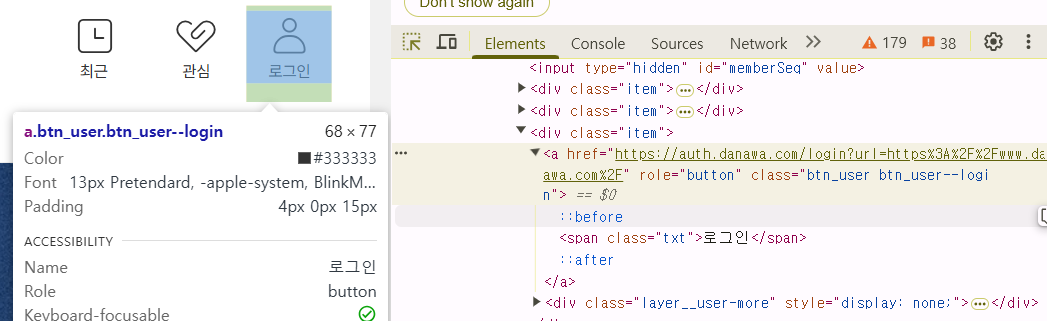

In [ ]:
from selenium import webdriver

driver = webdriver.Chrome("./Selenium/chromedriver")
driver.implicitly_wait(3)

# 크롬 웹드라이버에서 다나와 웹 사이트 실행
driver.get("https://www.danawa.com/")

# 다나와 메인화면의 로그인 버튼을 누르는 작업 실행
# 개발자 도구에서 확인
login = driver.find_element_by_css_selector('li.my_page_service > a')
print("HTML 요소: ", login)
print("태그 이름: ", login.tag_name)
print("문자열: ", login.text)
print("href 속성: ", login.get_attribute('href'))

login.click()
driver.implicitly_wait(3)

# 아이디/비밀번호를 입력하고 로그인하기 버튼을 누르는 작업 실행
my_id = "----본인 아이디 입력하세요----"
my_pw = "----본인 패스워드 입력하세요----"

driver.find_element_by_id('danawa-member-login-input-id').send_keys(my_id)
driver.implicitly_wait(2)
driver.find_element_by_name('password').send_keys(my_pw)
driver.implicitly_wait(2)
driver.find_element_by_css_selector('button.btn_login').click()

**13) 동적 웹페이지(2)**


In [ ]:
from selenium import webdriver

driver = webdriver.Chrome("./Selenium/chromedriver")
driver.implicitly_wait(3)
driver.get("https://www.danawa.com/")

# 다나와 메인화면의 로그인 버튼을 누르는 작업 실행
login = driver.find_element_by_css_selector('li.my_page_service > a')
login.click()
driver.implicitly_wait(3)

# 아이디/비밀번호를 입력하고 로그인하기 버튼을 누르는 작업 실행
my_id = "----본인 아이디 입력하세요----"
my_pw = "----본인 패스워드 입력하세요----"

driver.find_element_by_id('danawa-member-login-input-id').send_keys(my_id)
driver.implicitly_wait(2)
driver.find_element_by_name('password').send_keys(my_pw)
driver.implicitly_wait(2)
driver.find_element_by_css_selector('button.btn_login').click()
driver.implicitly_wait(2)

# 관심상품 목록 HTML 페이지 가져오기
wishlist = driver.find_element_by_css_selector('li.interest_goods_service > a').click()
driver.implicitly_wait(2)
html_src = driver.page_source
driver.close()
print(html_src[:500])
print("\n")

# 관심상품 목록 HTML 페이지를 BeautifulSoup으로 파싱하기
from bs4 import BeautifulSoup
import re
soup = BeautifulSoup(html_src, 'html.parser')

wish_table = soup.select('table[class="tbl wish_tbl"]')[0]
wish_items = wish_table.select('tbody tr')

for item in wish_items:
    title = item.find('div', {'class':'tit'}).text
    price = item.find('span', {'class':'price'}).text
    link = item.find('a', href=re.compile('prod.danawa.com/info/')).get('href')
    print(title)
    print(price)
    print(link)
    print("\n")

**14) 한국은행 경제통계시스템 통계지표 활용하기(1)**

웹페이지에서 파일 다운로드 실행

In [20]:
from selenium import webdriver
import time

# 100대 통계지표 엑셀 다운로드
def download_bok_statistics():

    driver = webdriver.Chrome("./Selenium/chromedriver")
    driver.implicitly_wait(3)
    driver.get("http://ecos.bok.or.kr/jsp/vis/keystat/#/key")


    excel_download = driver.find_element_by_css_selector('img[alt="download"]')
    driver.implicitly_wait(3)

    excel_download.click()
    time.sleep(5)

    driver.close()
    print("파일 다운로드 실행...")

    return None


# 함수 실행 - 100대 통계지표 엑셀 다운로드
download_bok_statistics()

ModuleNotFoundError: No module named 'selenium'

**14) 한국은행 경제통계시스템 통계지표 활용하기(2)**

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time

# 통계지표 검색어를 입력하여, CSV 파일로 저장하기
def download_bok_statistics_by_keyword():

    item_found = 0
    while not item_found:

        # 검색어 초기화
        keyword = ""
        while len(keyword) == 0:
            keyword = str(input("검색할 항목을 입력하세요: "))

        # 웹 드라이버 실행
        driver = webdriver.Chrome("./Selenium/chromedriver")
        driver.implicitly_wait(3)
        driver.get("http://ecos.bok.or.kr/jsp/vis/keystat/#/key")
        time.sleep(5)

        items1 = driver.find_elements_by_css_selector('a[class="ng-binding"]')
        items2 = driver.find_elements_by_css_selector('a[class="a-c1-list ng-binding"]')
        items3 = driver.find_elements_by_css_selector('a[class="a-c4-list ng-binding"]')
        driver.implicitly_wait(3)

        items = items1[1:] + items2 + items3

        for idx, item in enumerate(items):
            if keyword in item.text:
                print("검색어 '%s'에 매칭되는 '%s' 통계지표를 검색 중..." % (keyword, item.text))
                item.click()
                item_found = 1
                time.sleep(5)
                break
            elif idx == (len(items) - 1):
                print("검색어 '%s'에 대한 통계지표가 존재하지 않습니다..." % keyword)
                driver.close()
                continue
            else:
                pass


    # 검색결과 로딩 HTML 웹 페이지를 파싱 - 통계지표 테이블(표) 양식을 정리
    html_src = driver.page_source
    soup = BeautifulSoup(html_src, 'html.parser')
    driver.close()

    table_items = soup.find_all('td', {'class':'ng-binding'})
    date = [t.text for i, t in enumerate(table_items) if i % 3 == 0]
    value = [t.text for i, t in enumerate(table_items) if i % 3 == 1]
    change = [t.text for i, t in enumerate(table_items) if i % 3 == 2]

    # CSV 파일로 저장
    result_file = open('./data/bok_statistics_%s.csv' % keyword, 'w')

    for i in range(len(date)):
        result_file.write("%s, %s, %s" % (date[i], value[i], change[i]))
        result_file.write('\n')

    result_file.close()
    print("키워드 '%s'에 대한 통계지표를 저장하였습니다." % keyword)

    return date, value, change


#함수 실행 - 'CD수익률' 통계지표를 별도로 검색, CSV 파일로 저장
result = download_bok_statistics_by_keyword()
print(result)